# Test DQN from github 

In [4]:
# Import code
import gymnasium as gym
import jax.numpy as jnp
from dqn import DQNFixedTarget
from run import train, test

In [32]:
actions = jnp.linspace(-2., 2., 10) # gives [-2.,0.,2.]
print(actions)

[-2.         -1.5555556  -1.1111112  -0.6666667  -0.22222227  0.22222227
  0.66666675  1.1111112   1.5555556   2.        ]


In [ ]:
# Run training for agent
actions = jnp.linspace(-1., 1., 3) # gives [-2.,0.,2.]
print(actions)
obs_dim = 3
h_layer_size = 16
layer_spec = [obs_dim] + [h_layer_size] + [actions.shape[0]]
agent = DQNFixedTarget(actions, layer_spec=layer_spec, update_every=2)
env = gym.make('Pendulum-v1', g=9.81)
rewards_train, losses, agent = train(env, agent, train_eps=40, batch_size=100, buffer_size=10000, lr=1e-2, eps=0.5, eps_min=0.1)
#env = gym.make('Pendulum-v1', g=9.81, render_mode="human")
rewards_test = test(env, agent, test_eps=1)

Episode:  24
Reward:  -1289.330489607835
Mean loss:  16.31071


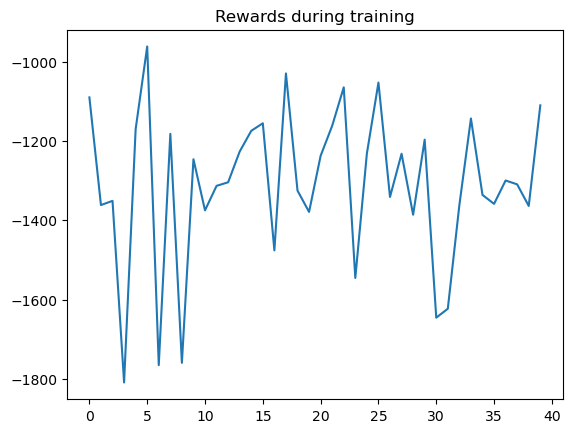

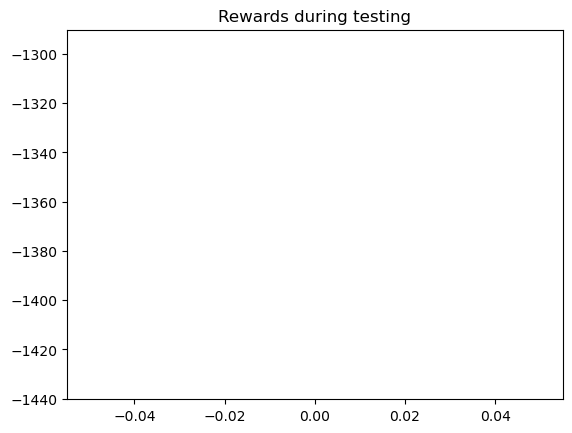

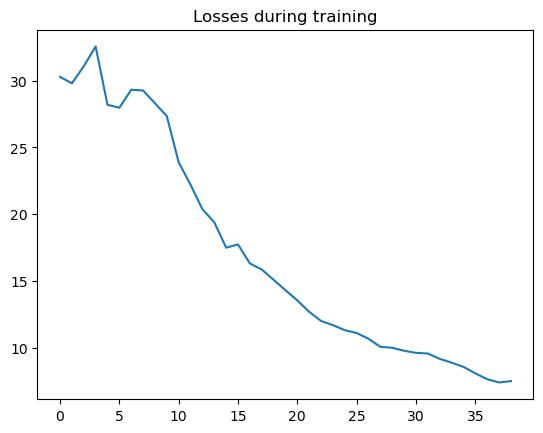

In [52]:
# Plot results of agent
import matplotlib.pyplot as plt
plt.figure()
plt.title("Rewards during training")
plt.plot(rewards_train)
plt.figure()
plt.title("Rewards during testing")
plt.plot(rewards_test)
plt.figure()
plt.title("Losses during training")
plt.plot(losses)